# Feature Scaling Techniques:-

# Normalization 
**Normalization is a technique of Feature Scaling that rescales feature values to a fixed range, 
typically between 0 and 1** 

**It is used to ensure all features contribute equally to a machine learning model and to improve algorithm performance, 
especially for distance-based algorithms like K-Nearest Neighbors and gradient-based algorithms that benefit from 
features on a consistent scale.**  

# (1) Min-Max Scaling:   
**Xi' = (Xi - min(X)) / (max(X) - min(X)).**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns = ['Class Label', 'Alcohol', 'Malic Acid']

In [3]:
df.head()

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [4]:
df.describe()

,Class Label,Alcohol,Malic Acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


Text(0.5, 1.0, 'KDE of Malic Acid')

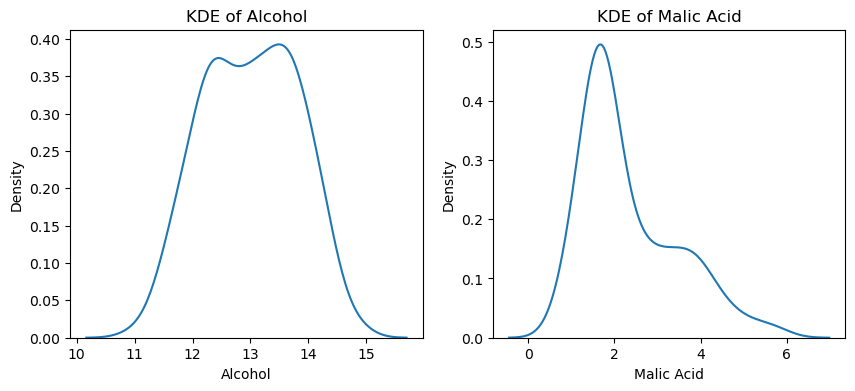

In [5]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(df['Alcohol'])
plt.title('KDE of Alcohol')
plt.subplot(1,2,2)
sns.kdeplot(df['Malic Acid'])
plt.title('KDE of Malic Acid')

Text(0.5, 1.0, 'Scatter Plot of Alcohol')

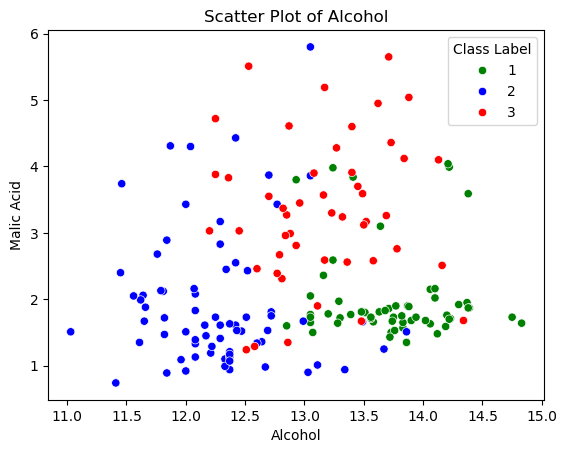

In [6]:

sns.scatterplot(x=df['Alcohol'], y=df['Malic Acid'], hue=df['Class Label'], palette={1:'green', 2:'blue', 3:'red'})
plt.title('Scatter Plot of Alcohol')


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Class Label', axis=1)
y = df['Class Label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
X_train.shape, X_test.shape

((133, 2), (45, 2))

In [10]:
y_train.shape, y_test.shape

((133,), (45,))

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [13]:
X_scaled_train.shape, X_scaled_test.shape

((133, 2), (45, 2))

In [14]:
X_scaled_train = pd.DataFrame(X_scaled_train, columns=X_train.columns)
X_scaled_test = pd.DataFrame(X_scaled_test, columns=X_test.columns)

In [15]:
X_scaled_train.describe()
# Now minimum value of both Alcohol and Malic Acid is 0 and their maximum value is 1.
# Before it was not the case 

,Alcohol,Malic Acid
count,133.000000,133.000000
mean,0.511278,0.304856
std,0.218419,0.223810
min,0.000000,0.000000
25%,0.331579,0.152749
50%,0.515789,0.205703
75%,0.700000,0.464358
max,1.000000,1.000000


Text(0.5, 1.0, 'KDE of Malic Acid')

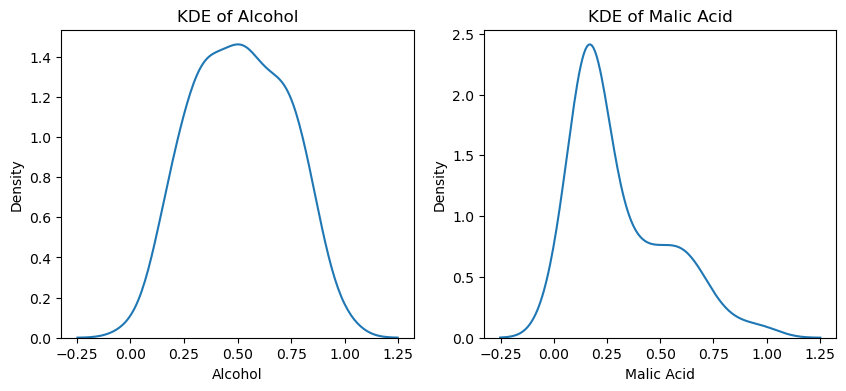

In [16]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(X_scaled_train['Alcohol'])
plt.title('KDE of Alcohol')
plt.subplot(1,2,2)
sns.kdeplot(X_scaled_train['Malic Acid'])
plt.title('KDE of Malic Acid')

Text(0.5, 1.0, 'Scatter Plot of Alcohol vs Malic Acid')

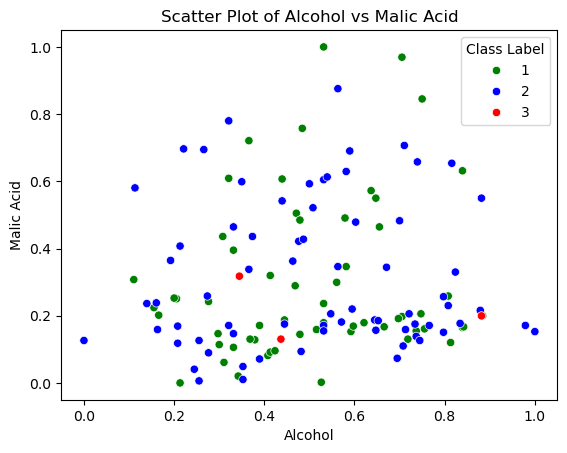

In [17]:

sns.scatterplot(x=X_scaled_train['Alcohol'], y=X_scaled_train['Malic Acid'], hue=df['Class Label'], palette={1:'green', 2:'blue', 3:'red'})
plt.title('Scatter Plot of Alcohol vs Malic Acid')
# Now their values range between 0 and 1.
# That means Normalization has brought their values to a common scale.

In [19]:
# ============================================================

# (2) Mean Normalization:  
**Xi' = (Xi - mean(X)) / (max(X) - min(X)).**      
**It gives value between the range of -1 to 1**  
**It is rarely used**

In [18]:
# ============================================================

# (3) Robust Scaling: 
**Xi' = ( Xi - mean(X) )/ ( Inter Quartile Range (IQR) )**  
**It is used when we have outliers in our data**